In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
from skimage import color, data, restoration
from seam_carving_util import rgb2gray, norm, top3, del_path, min_at, mark_path
from scipy.misc import imshow

In [4]:
#Creem matriu de distàncies
def calc_dists(mat):
    back = np.zeros(mat.shape, dtype=int)
    dists = mat.copy()
    x, y = mat.shape
    
    for i in range(1, x):
        for j in range(0, y):
            # Recorrem la matriu, guardem l'índex d'on venim per a cada posició
            index = min_at(top3(dists,(i,j)))
            #dists[i][j] = mat[i][j] + dists[i-1][index-1]
            if not j:
                back[i][j] = index 
                min_energy = dists[i - 1][index]
            else:
                back[i][j] = index + j -1
                min_energy = dists[i - 1][j+ index - 1]
            dists[i][j] += min_energy
    return dists, back

def min_path(dist ,back):
    x,y = back.shape
    path = []
    j = min_at(dist[-1])
    for i in reversed(range(x)):
        path.append([i, j])
        j = back[i][j]
    
    return path

Carreguem imatge a la memòria:


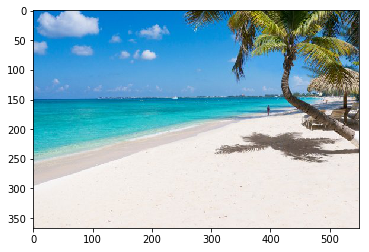

Calculem el gradient:


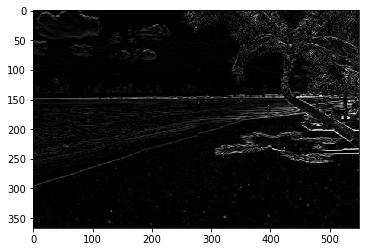

In [5]:
%matplotlib inline
print("Carreguem imatge a la memòria:")
original = plt.imread('img/beach.jpg')/255.
plt.imshow(original)
plt.show()

print("Calculem el gradient:")
dx = nd.sobel(rgb2gray(original), 0)
plt.imshow(np.abs(dx), cmap='gray')
plt.show()

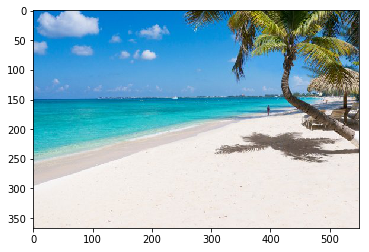

0


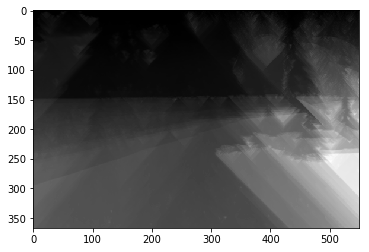

1


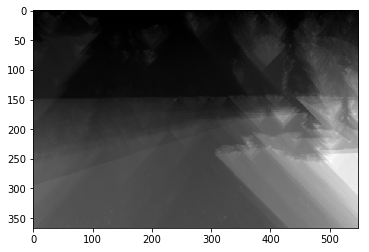

2


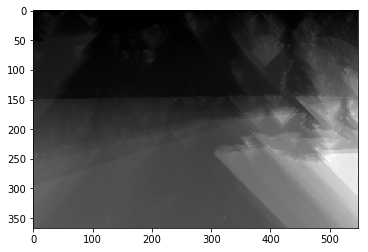

3


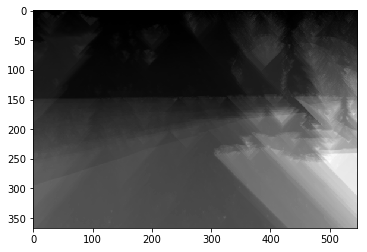

4


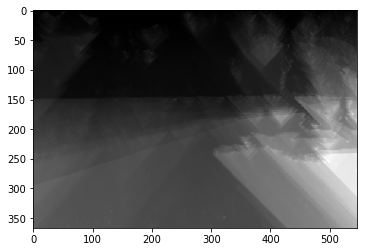

5


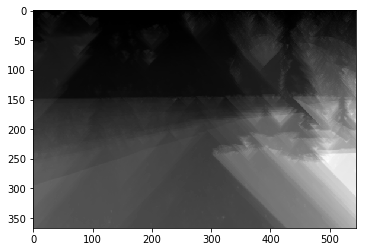

6


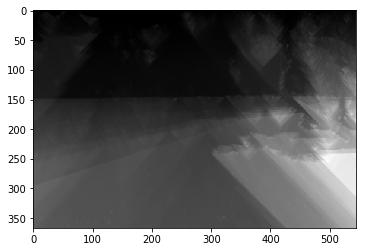

7


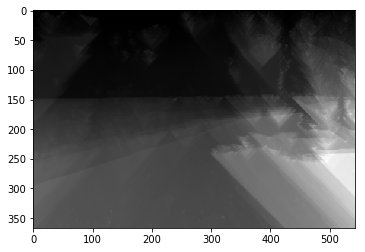

8


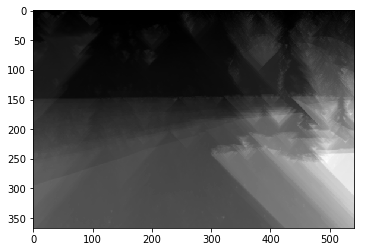

9


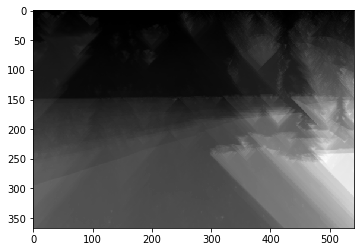

10


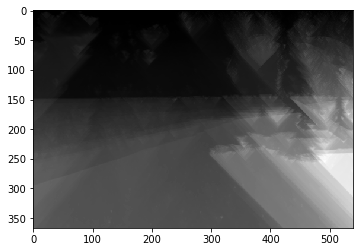

11


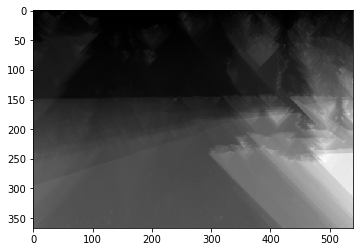

12


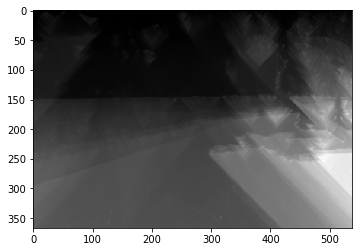

13


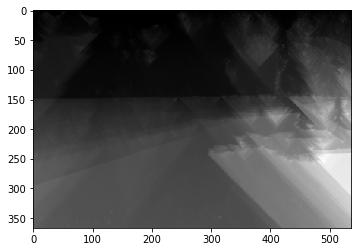

14


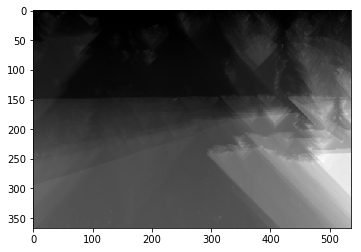

15


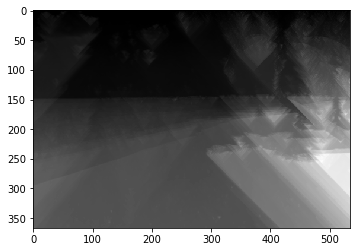

16


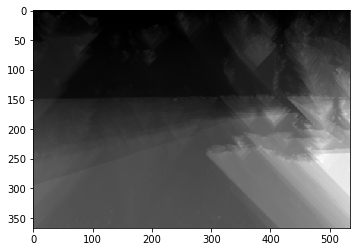

17


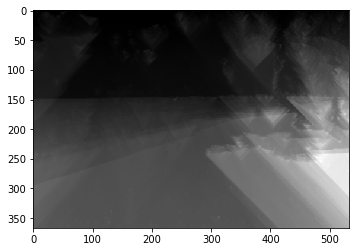

18


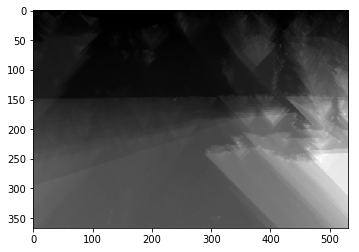

19


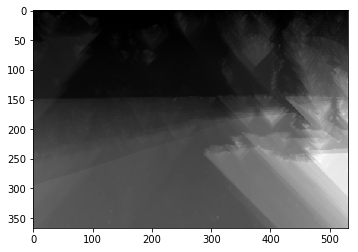

20


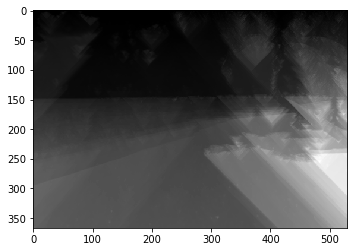

21


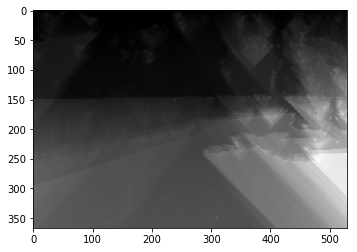

22


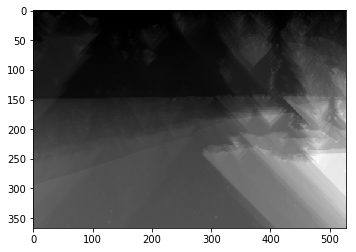

23


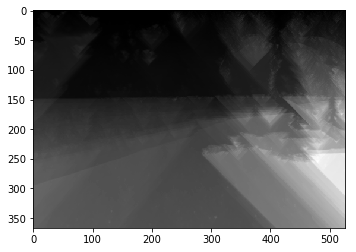

24


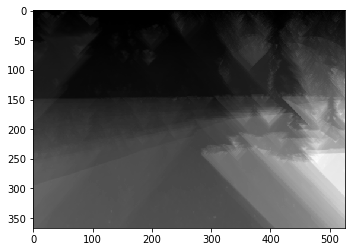

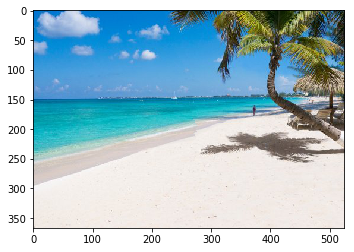

In [6]:
reduced_img = plt.imread('img/beach.jpg')/255.
plt.imshow(reduced_img)
plt.show()
for i in range(25):
    print(i)
    dx = nd.sobel(rgb2gray(reduced_img), 0)
    dist_mat, back_mat = calc_dists(np.abs(dx))
    path = min_path(dist_mat, back_mat)
    plt.imshow(dist_mat, cmap='gray')
    plt.show()
    reduced_img = del_path(reduced_img, path)
    tmp = del_path(reduced_img, path)

plt.imshow(reduced_img)
plt.show()


In [7]:
def remove_pixels(img, coords):
    
    img.setflags(write=1)
    coords = [(min(coords[0][0], coords[1][0]), min(coords[0][1], coords[1][1])), 
              (max(coords[0][0], coords[1][0]), max(coords[0][1], coords[1][1]))]
    if len(img.shape) == 3:
        img[coords[0][1]:coords[1][1]+1, coords[0][0]:coords[1][0]+1, :] = -90000000
    else:
        img[coords[0][1]:coords[1][1]+1, coords[0][0]:coords[1][0]+1] = -90000000
    return img

[(379, 145), (423, 197)]

[(379, 145), (423, 197)]

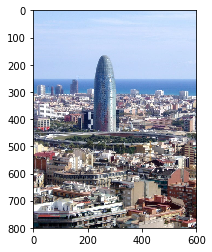

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95


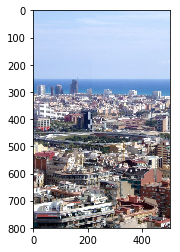

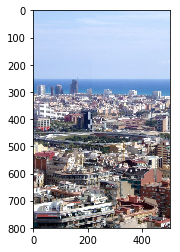

In [14]:
reduced_img = plt.imread('img/agbar_a.jpg')/255.
plt.imshow(reduced_img)
plt.show()

remove = [[379, 145], [423, 197]]
remove = [[218,155],[313,447]]
#remove = [[4,1], [4,2]]

for i in range(remove[1][0] - remove[0][0] +1):
    print(i)
    dx = nd.sobel(rgb2gray(reduced_img), 0)
    dx = remove_pixels(np.abs(dx), remove)
    remove[1][0] -= 1
    dist_mat, back_mat = calc_dists(dx)
    path = min_path(dist_mat, back_mat)
    
    reduced_img = del_path(reduced_img, path)

plt.imshow(reduced_img)
plt.show()
plt.imshow(reduced_img)
plt.savefig("abgarrrrr.png")

In [16]:
from scipy.misc import imsave
# x is the array you want to save 
imsave("abgarrrrrrrrrrr.png", reduced_img)